# Data Wrangling and Pre Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")


In [2]:
# Load the data from the file recruitmentdataset.csv. (2)
df = pd.read_csv("recruitmentdataset.csv")
df.head()


,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


In [3]:

print(df.isnull().sum()) 
# No null values, no need for data wrangling for null values

Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64


### Restricting dataset to Company = D only

In [4]:
df = df[df['company']=='D']
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
3000,x4293e,female,28,Dutch,Golf,65,False,False,True,False,1,False,phd,D,True
3001,x8138a,female,22,Dutch,Football,70,False,True,False,False,1,True,master,D,True
3002,x8454a,male,26,Dutch,Tennis,59,False,False,False,False,2,False,bachelor,D,False
3003,x9679f,male,23,Dutch,Tennis,69,False,True,False,True,2,True,master,D,True
3004,x8821g,female,21,Dutch,Football,66,False,False,False,True,2,False,bachelor,D,True


### Changing categorical data in to Numerical data to make them ready for machine learning model

In [5]:
df[['gender', 'nationality','sport','ind-degree']] = df[['gender', 'nationality','sport','ind-degree']].apply(lambda x: pd.factorize(x)[0])

### Changing boolean variables from True/False to 1/0.

In [6]:
df["ind-debateclub"] = df["ind-debateclub"].astype(int)
df["ind-programming_exp"] = df["ind-programming_exp"].astype(int)
df["ind-international_exp"] = df["ind-international_exp"].astype(int)
df["ind-entrepeneur_exp"] = df["ind-entrepeneur_exp"].astype(int)
df["ind-exact_study"] = df["ind-exact_study"].astype(int)
df["decision"] = df["decision"].astype(int)

In [7]:
df.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
3000,x4293e,0,28,0,0,65,0,0,1,0,1,0,0,D,1
3001,x8138a,0,22,0,1,70,0,1,0,0,1,1,1,D,1
3002,x8454a,1,26,0,2,59,0,0,0,0,2,0,2,D,0
3003,x9679f,1,23,0,2,69,0,1,0,1,2,1,1,D,1
3004,x8821g,0,21,0,1,66,0,0,0,1,2,0,2,D,1


----------------------------------------------------
----------------------------------------------------
----------------------------------------------------

# Model 1 :  Support Vector Machines with linear kernel
Model M1 incorporates Support Vector Machines with linear kernel (i.e. sklearn.svm.SVM) and should only use four indicators.

### Selecting  four indicators as descriptive features for the model. 

- 'ind-debateclub'
- 'ind-programming_exp',
- 'ind-international_exp', 
- 'ind-entrepeneur_exp'






In [8]:
# extracting descriptive features
descriptive_features_model1 = df[[ 'ind-debateclub', 'ind-programming_exp','ind-international_exp', 'ind-entrepeneur_exp']]
descriptive_features_model1


,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp
3000,0,0,1,0
3001,0,1,0,0
3002,0,0,0,0
3003,0,1,0,1
3004,0,0,0,1
...,...,...,...,...
3995,0,0,0,0
3996,0,0,0,1
3997,1,0,0,1
3998,0,1,0,0


### Setting Decision as Target Feature

In [9]:
# extracting target feature
target_feature = df.iloc[:,-1:]
print(target_feature)

      decision
3000         1
3001         1
3002         0
3003         1
3004         1
...        ...
3995         0
3996         0
3997         0
3998         0
3999         0

[1000 rows x 1 columns]


### Splitting dataset in to training and test datasets.
70% Training data and 30% Test Data

In [10]:
X = descriptive_features_model1
y = target_feature



In [11]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [12]:
X_train.head()

,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp
3550,0,0,0,0
3400,0,0,1,0
3548,1,0,0,1
3877,0,0,1,0
3091,1,0,0,0


In [13]:
y_test.head()

,decision
3267,1
3564,1
3325,1
3885,0
3992,0


In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((700, 4), (700, 1), (300, 4), (300, 1))

### Developing Model 1 with random 4 indicators.

In [15]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the data
model1.fit(X_train, y_train)

#Predict the decision for the dataset
prediction_model1 = model1.predict(X_test)

In [16]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy of model1 with random 4 indicators:",metrics.accuracy_score(y_test, prediction_model1)*100,'%')

Accuracy of model1 with random 4 indicators: 73.0 %


----------------------------------------------------
----------------------------------------------------
----------------------------------------------------

# Model 2: 

Build a prediction model M2 using the technique of your choice and any indicators you want. Does your model perform better? Explain how you trained and tested the model and why you have chosen these indicators.

### Important indicators

For model 2, we need to find features that contribute the most towards correct prediction i.e. Features that have comparatively heavier weights in forming the decision, we use Random forest classifier on the dataset consisting of all indicators. 

Accuracy: 0.963


<AxesSubplot:>

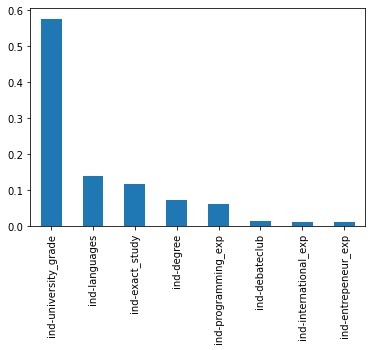

In [17]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# dataframe consisting of Indicators only.
df2 = df.iloc[:,5:-2]
df2.head()

#Create a Random Forest classifier
clf=RandomForestClassifier(n_estimators=500)

clf.fit(df2,target_feature)

y_pred=clf.predict(df2)
print("Accuracy:",metrics.accuracy_score(target_feature, y_pred))
#Plotting important features
feat_importances = pd.Series(clf.feature_importances_, index=df2.columns)
feat_importances.nlargest(20).plot(kind='bar')

### Selecting first four indicators as descriptive features for the model 2. 
- ind-university_grade,	
- ind-languages,	
- ind-exact_study 	
- ind-degree 

In [18]:
# extracting descriptive features
descriptive_features_model2 = df[['ind-university_grade', 'ind-languages','ind-exact_study', 'ind-degree']]
descriptive_features_model2

,ind-university_grade,ind-languages,ind-exact_study,ind-degree
3000,65,1,0,0
3001,70,1,1,1
3002,59,2,0,2
3003,69,2,1,1
3004,66,2,0,2
...,...,...,...,...
3995,63,0,0,1
3996,62,2,1,2
3997,60,2,0,2
3998,66,1,1,2


### Splitting dataset in to training and test datasets.
70% Training data and 30% Test Data

In [19]:
X2 = descriptive_features_model2
y2 = target_feature



In [20]:
# split into train test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.3)

In [21]:
X2_train.head()

,ind-university_grade,ind-languages,ind-exact_study,ind-degree
3353,67,2,1,2
3765,59,1,0,2
3281,50,0,0,2
3357,55,2,0,2
3552,60,0,0,2


In [22]:
y2_test.head()

,decision
3437,0
3952,0
3668,0
3410,0
3829,1


In [23]:
X2_train.shape,y2_train.shape,X2_test.shape,y2_test.shape

((700, 4), (700, 1), (300, 4), (300, 1))

In [24]:


model2 = RandomForestClassifier(n_estimators=500)

#Train the model2 using the data
model2.fit(X2_train,y2_train)

#Predict the decision for the dataset
prediction_model2 = model2.predict(X2_test)

In [25]:

print("Accuracy of model2 with most important indicators:",metrics.accuracy_score(y2_test, prediction_model2)*100,'%')

Accuracy of model2 with most important indicators: 94.66666666666667 %


----------------------------------------------------
----------------------------------------------------
----------------------------------------------------

# Model 3: 
Build a model M3 using not the indicators but the general descriptors. Evaluate the model. Would it be ethical to use this model? Why / why not?

### Selecting  four descriptors as descriptive features for the model 3
- gender	
- age	
- nationality	
- sport

In [48]:
# extracting descriptive features
descriptive_features_model3 = df.iloc[:,1:5]

### Splitting dataset in to training and test datasets.
70% Training data and 30% Test Data

In [49]:
X3 = descriptive_features_model3
y3 = target_feature

In [50]:
# split into train test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,test_size=0.3)

In [51]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model3 = GaussianNB()
# Train the model using the training sets
model3.fit(X3_train,y3_train)
#Predict the decision for the dataset
prediction_model3 = model3.predict(X3_test)

In [52]:
print("Accuracy of model3 with first 4 Descriptors:",metrics.accuracy_score(y3_test, prediction_model3)*100,'%')

Accuracy of model3 with first 4 Descriptors: 66.66666666666666 %


# Conclusion:
- It is not ethical to use Descriptors as training features as they may be sensitive identifiers and reveal information regarding the individual, compromising his privacy. 
- Descriptors are not anonymized.
- Descriptors do not contribute really well towards the predicition of Recruitment as gender,age, nationality, sport do not play important role towards a recruitment of a person. 
- Random Forest Classifier model predicted with better accuracy with most important indicators.